# Data Story
### To analyse if reminders to save increase savings.

\
**Note** - Some columns represent values in 0s and 1s. 0 is equivalent to False whereas 1 is equivalent to True.



In [ ]:
#Importing the important modules

In [3]:
import pandas as pd
import statistics
import plotly.express as px

Now let's visualise the data to see if we can find anything?

In [5]:
#Uploading the csv
from google.colab import files
data_to_load = files.upload()

#Plotting the graph
df = pd.read_csv("savings_data.csv")
fig = px.scatter(df, y="quant_saved", color="highschool_completed")
fig.show()

Saving savings_data.csv to savings_data (3).csv


If we look at this data, we can see that the yellow dots are the ones who finished high school (**Since 1 stands for True**) while the blue dots are the ones who were not able to finish high school.

\
We can also see that most of the outliers are the Blue dots, who have not completed high school.



In [6]:
df.head()

,quant_saved,female,highschool_completed,wealthy
0,13.0908,1,0,0
1,39.2724,0,1,1
2,294.5430,0,1,1
3,58.9086,1,1,1
4,78.5448,1,1,1


In [8]:
import csv

with open('savings_data.csv', newline="") as f:
  reader = csv.reader(f)
  savings_data = list(reader)

savings_data.pop(0)

#Finding total number of people and number of people who were reminded
total_entries = len(savings_data)
total_people_given_reminder = 0
for data in savings_data:
  if int(data[3]) == 1:
    total_people_given_reminder += 1

import plotly.graph_objects as go

fig = go.Figure(go.Bar(x=["Went to High School", "Not Went to High School"], y=[total_people_given_reminder, (total_entries - total_people_given_reminder)]))

fig.show()

Here, we can see that about 10 thousand people were did not go to high school, compared to about 3 thousand people who did go to high school.

Let's see what is the mean, median and mode of the savings made by people.

In [9]:
#Mean, median and mode of savings
all_savings = []
for data in savings_data:
  all_savings.append(float(data[0]))

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")

Mean of savings - 85.32780331328739
Median of savings - 39.2724
Mode of savings - 0.0


In [11]:
#Mean, median and mode of savings
reminded_savings = []
not_reminded_savings = []
for data in savings_data:
  if int(data[3]) == 1:
    reminded_savings.append(float(data[0]))
  else:
    not_reminded_savings.append(float(data[0]))

print("Results for people who went to high school")
print(f"Mean of savings - {statistics.mean(reminded_savings)}")
print(f"Median of savings - {statistics.median(reminded_savings)}")
print(f"Mode of savings - {statistics.mode(reminded_savings)}")
#To add new lines
print("\n\n")
print("Results for people who did not go to high school")
print(f"Mean of savings - {statistics.mean(not_reminded_savings)}")
print(f"Median of savings - {statistics.median(not_reminded_savings)}")
print(f"Mode of savings - {statistics.mode(not_reminded_savings)}")

Results for people who went to high school
Mean of savings - 78.61157672384391
Median of savings - 39.2724
Mode of savings - 2.284



Results for people who did not go to high school
Mean of savings - 87.22929365730847
Median of savings - 39.2724
Mode of savings - 0.0


There seems to be massive differences between the mean, median and modes of savings of people who both went to high school and did not go to high school. 

This could be due to an education gap between the two groups of people

In [13]:
#Standard Deviation
print(f"Standard deviation of all the data -> {statistics.stdev(all_savings)}")
print(f"Standard deviation of people who went to high school -> {statistics.stdev(reminded_savings)}")
print(f"Standard deviation of people who did not go to high school -> {statistics.stdev(not_reminded_savings)}")

Standard deviation of all the data -> 196.75453011909315
Standard deviation of people who went to high school -> 164.58072141099734
Standard deviation of people who did not go to high school -> 204.91519933877308


Here, we can see that the standard deviation varies a lot in all three types of data.

\
It is higher for the people who did not go to high school v/s the people who did go to high school.





In [19]:
import numpy as np

age = []
savings = []
for data in savings_data:
  if float(data[3]) != 0:
    age.append(float(data[2]))
    savings.append(float(data[0]))

correlation = np.corrcoef(age, savings)
print(f"Correlation between the high school completion of the person and their savings is - {correlation[0,1]}")


Correlation between the high school completion of the person and their savings is - 0.047902184270461313


Here, we receive the correlation between the age and the savings to be 0.03, which means that the given data is not correlated.

\
Let's see if this given data for savings follow a bell curved normal distribution

In [20]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df["highschool_completed"].tolist()], ["High School Completion"], show_hist=False)
fig.show()

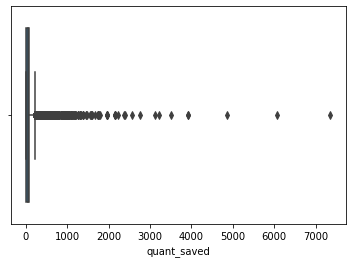

In [23]:
import seaborn as sns

sns.boxplot(data=df, x=df["quant_saved"])

Here, we can see that the majority of the data is represented by a thick, long black line. We then have a thin long black line and finally we have a horizontal line, which is the rest of the data.

\
Here, the thin black vertical line is the line that seperates the data we should use to do our analysis. Let's remove the outliers first.

In [24]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3-q1

print(f"Q1 - {q1}")
print(f"Q3 - {q3}")
print(f"IQR - {iqr}")

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(f"Lower Whisker - {lower_whisker}")
print(f"Upper Whisker - {upper_whisker}")

#Creating a new DataFrame
new_df = df[df["quant_saved"] < upper_whisker]

Q1 - 2.284
Q3 - 86.514
IQR - 84.22999999999999
Lower Whisker - -124.06099999999998
Upper Whisker - 212.85899999999998


In [25]:
#Mean, median and mode of savings
all_savings = new_df["quant_saved"].tolist()

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")
print(f"Standard deviation in savings - {statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

Mean of savings - 46.20051938981879
Median of savings - 36.0475
Mode of savings - 0.0
Standard deviation in savings - 50.86687191728863


In [26]:
#Collecting 1000 samples of 100 data points each, saving their averages in a list
import random

sampling_mean_list = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

In [27]:
print(f"Standard deviation of the sampling data - {statistics.stdev(sampling_mean_list)}")

Standard deviation of the sampling data - 4.9801230972958335


In [28]:
print(f"Mean of Population - {statistics.mean(all_savings)}")
print(f"Mean of Sampling Distribution - {mean_sampling}")

Mean of Population - 46.20051938981879
Mean of Sampling Distribution - 46.50877873561837


Awesome, they come out to be exactly the same.

Let's do one final check, by trying to find the correlation between the age and the savings with the new data from which we have removed the outliers!

We still have a correlation of 0.085, which is not significant.

\
Now, let's get back to the real question. Does reminder have any impact on the savings of the people? How can we achieve this statistically?

\
With the **z-test**! We will take a sample from the people who were given reminders and see if that sample fits with the population of people who were not given reminders. If it fits in well, we can say that the reminders had no significant effect.

\
Let's start with first filtering out the data of people who were given notifications and those who weren't given notifications.

In [31]:
reminded_df = new_df.loc[new_df["highschool_completed"] == 1]
not_reminded_df = new_df.loc[new_df["highschool_completed"] == 0]

print(reminded_df.head())
print(not_reminded_df.head())

   quant_saved  female  highschool_completed  wealthy
1      39.2724       0                     1        1
3      58.9086       1                     1        1
4      78.5448       1                     1        1
5      39.2724       1                     1        1
6      32.7270       1                     1        1
    quant_saved  female  highschool_completed  wealthy
0     13.090800       1                     0        0
9     52.363200       1                     0        0
28    47.178078       0                     0        0
29    98.181000       0                     0        0
38    39.272400       1                     0        0


In [35]:
fig = ff.create_distplot([not_reminded_df["quant_saved"].tolist()], ["Did not go to high school"], show_hist=False)
fig.show()

In [37]:
not_reminded_savings = not_reminded_df["quant_saved"].tolist()

sampling_mean_list_not_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))

mean_sampling_not_reminded = statistics.mean(sampling_mean_list_not_reminded)
stdev_sampling_not_reminded = statistics.stdev(sampling_mean_list_not_reminded)

print(f"Mean of Sampling (No High School) -> {mean_sampling_not_reminded}")
print(f"Standard Deviation of Sampling (No High School) -> {stdev_sampling_not_reminded}")
fig = ff.create_distplot([sampling_mean_list_not_reminded], ["Went to High School"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (No High School) -> 45.85833472295046
Standard Deviation of Sampling (No High School) -> 5.164312409698306


In [38]:
first_std_deviation_start = mean_sampling_not_reminded-stdev_sampling_not_reminded
first_std_deviation_end = mean_sampling_not_reminded+stdev_sampling_not_reminded
print(f"First (start) - {first_std_deviation_start} and First (end) - {first_std_deviation_end}")

second_std_deviation_start = mean_sampling_not_reminded-(2*stdev_sampling_not_reminded)
second_std_deviation_end = mean_sampling_not_reminded+(2*stdev_sampling_not_reminded)
print(f"Second (start) - {second_std_deviation_start} and Second (end) - {second_std_deviation_end}")

third_std_deviation_start = mean_sampling_not_reminded-(3*stdev_sampling_not_reminded)
third_std_deviation_end = mean_sampling_not_reminded+(3*stdev_sampling_not_reminded)
print(f"Third (start) - {third_std_deviation_start} and Third (end) - {third_std_deviation_end}")

First (start) - 40.694022313252155 and First (end) - 51.022647132648764
Second (start) - 35.52970990355385 and Second (end) - 56.18695954234707
Third (start) - 30.36539749385554 and Third (end) - 61.35127195204538


Now that we have everything we need for our z-test, let's quickly take a sampling distribution of the people who were reminded for saving.

In [40]:
reminded_savings = reminded_df["quant_saved"].tolist()

sampling_mean_list_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(reminded_savings))
  sampling_mean_list_reminded.append(statistics.mean(temp_list))

mean_sampling_reminded = statistics.mean(sampling_mean_list_reminded)
stdev_sampling_reminded = statistics.stdev(sampling_mean_list_reminded)

print(f"Mean of Sampling (Went to High School) -> {mean_sampling_reminded}")
print(f"Standard Deviation of Sampling (Went to High School) -> {stdev_sampling_reminded}")
fig = ff.create_distplot([sampling_mean_list_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Went to High School) -> 46.57140923304989
Standard Deviation of Sampling (Went to High School) -> 4.981759087607869


In [41]:
z_score = (mean_sampling_reminded - mean_sampling_not_reminded) / stdev_sampling_not_reminded
print(f"Z-Score is - {z_score}")

Z-Score is - 0.13807733799378896
